In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import gymnasium as gym
from gymnasium import spaces


In [109]:
COLUMNS = 5
ROWS = 5

In [110]:
class GridEnv(gym.Env):
    def __init__(self):
        super(GridEnv, self).__init__()
        self.action_space = spaces.Discrete(4)  # Up, Down, Left, Right
        self.observation_space = spaces.Box(low=np.array([0, 0]), high=np.array([ROWS - 1, COLUMNS - 1]), dtype=np.int32)
        self.reward_map = np.full((ROWS, COLUMNS), 1)
        self.tractores_positions = [(0, 0)]
        self.current_harvest = 0
        self.step_counter = 0  # Initialize step counter
        self.reset()

    def reset(self):
        self.reward_map = np.full((ROWS, COLUMNS), 1)
        self.current_harvest = 0
        self.step_counter = 0
        # Return initial positions as tuples
        return [pos for pos in self.tractores_positions]
         
    def is_done(self):
        max_steps = 100
        return np.all(self.reward_map == -1) or self.step_counter >= max_steps      
   
    def state_to_index(self, state):
        # Convert state to a single integer if needed (can be removed if we always use tuple states)
        if isinstance(state, tuple):
            return state[0] * COLUMNS + state[1]
        return state
        
    def step(self, actions):
        rewards = []
        new_positions = []
        for i, action in enumerate(actions):
            x, y = self.tractores_positions[i]
            if action == 0 and x > 0: x -= 1
            elif action == 1 and x < ROWS - 1: x += 1
            elif action == 2 and y > 0: y -= 1
            elif action == 3 and y < COLUMNS - 1: y += 1
            new_positions.append((x, y))

        # Removed collision check as there is only one tractor

        for i, pos in enumerate(new_positions):
            self.tractores_positions[i] = pos
            if self.reward_map[pos] == 1:
                reward = 1
                self.current_harvest += 1
            else:
                reward = -1
            self.reward_map[pos] = 0
            rewards.append(reward)
        self.step_counter += 1  # Increment step counter
        return [self.tractores_positions[i] for i in range(len(actions))], rewards

        
    def render(self, mode='human'):
        plt.figure(figsize=(5, 5))
        plt.imshow(self.reward_map, cmap='viridis', origin='lower')
        for pos in self.tractores_positions:
            plt.scatter(pos[1], pos[0], c='red', marker='o')  # Agent's position
        plt.title("Agent's Movement in Grid")
        plt.grid(False)
        plt.show()        

In [111]:
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, epsilon=0.1, gasoline_capacity=1000, wheat_capacity=100):
        self.env = env
        self.gasoline = gasoline_capacity  # Initial gasoline level
        self.wheat = 0  # Initial wheat level
        self.gasoline_capacity = gasoline_capacity
        self.wheat_capacity = wheat_capacity

        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((ROWS, COLUMNS, env.action_space.n))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = np.argmax(self.q_table[state])
        return action
    
    def learn(self, state, action, reward, next_state):
        predict = self.q_table[state + (action,)]
        target = reward + self.discount_factor * np.max(self.q_table[next_state])
        self.q_table[state + (action,)] += self.learning_rate * (target - predict)

In [114]:
def train(episodes=1000, steps_per_episode=100):
    field = GridEnv()
    agent1 = QLearningAgent(field)
    best_path = []

    for episode in range(episodes):
        states = field.reset()
        current_path = [states]
        total_reward = 0

        for step in range(steps_per_episode):
            action1 = agent1.choose_action(states[0])
            new_states, rewards = field.step([action1])
            agent1.learn(states[0], action1, rewards[0], new_states[0])
            states = new_states
        print(field.current_harvest)
        

train()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


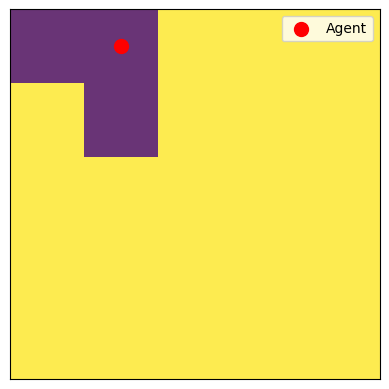

In [113]:
def animation_plot(env, ax):
    ax.clear()
    ax.imshow(env.reward_map, cmap='viridis', alpha=0.8)
    for pos in env.tractores_positions:
        ax.scatter(pos[1], pos[0], color='red', label='Agent', s=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()

def update(frame, env, agent, ax):
    if not hasattr(update, "done") or not update.done:
        action = agent.choose_action(env.tractores_positions[0])
        new_states, _ = env.step([action])
        env.tractores_positions[0] = new_states[0]  # Update tractor position
        update.done = env.is_done()
        animation_plot(env, ax)

fig, ax = plt.subplots()

# Reset the environment and the agent for the animation
env = GridEnv()
agent = QLearningAgent(env)
env.reset()

# Create the animation
animation = FuncAnimation(fig, lambda frame: update(frame, env, agent, ax), frames=100, interval=100)

# Display the animation in Jupyter Notebook
HTML(animation.to_jshtml())